Step 1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a consistent style for our plots
sns.set_style('darkgrid')

Cloning the Dataset

In [ ]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 4.45 MiB/s, done.
Resolving deltas: 100% (3/3), done.


Step 2: Inspecting the Dataset

In [ ]:
netflix_df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Get a concise summary of the dataframe
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


Step 3: Data Cleaning and Tranforming

In [ ]:
netflix_df['director'] = netflix_df['director'].fillna("Unknown")
netflix_df['cast'] = netflix_df['cast'].fillna("Unknown")
mode_country = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode_country)
netflix_df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [ ]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)

In [ ]:
# 5. Create new features for year and month added
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [ ]:
print("Missing values after cleaning:")
print(netflix_df.isnull().sum())
print("\nData types after transformation:")
print(netflix_df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


Step 4: EDA

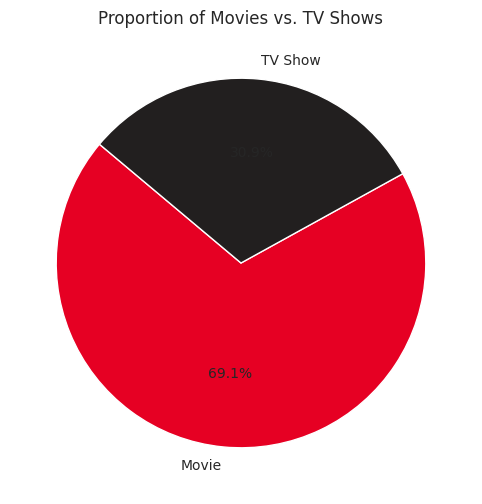

In [ ]:
plt.figure(figsize=(8, 6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

<Figure size 1400x800 with 0 Axes>

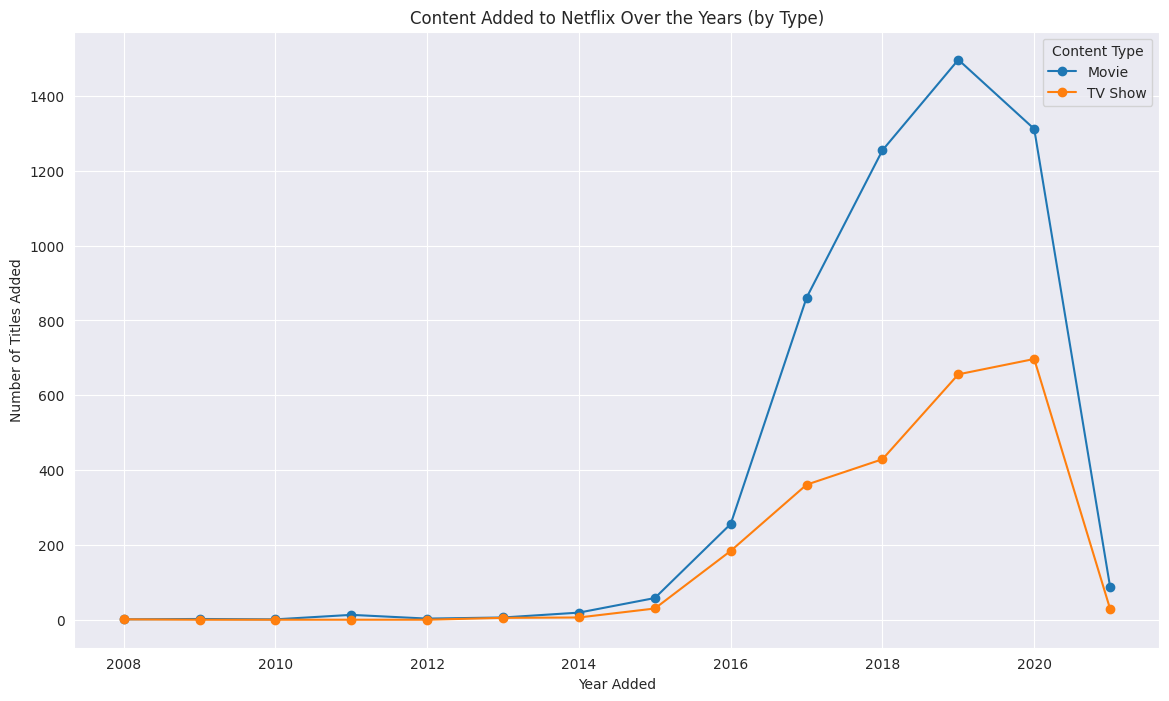

In [ ]:
# Group data by year and content type
content_over_time = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

In [ ]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


In [ ]:
# Split the 'listed_in' column and explode it
genres = netflix_df.assign(genre=netflix_df['listed_in'].str.split(', ')).explode('genre')

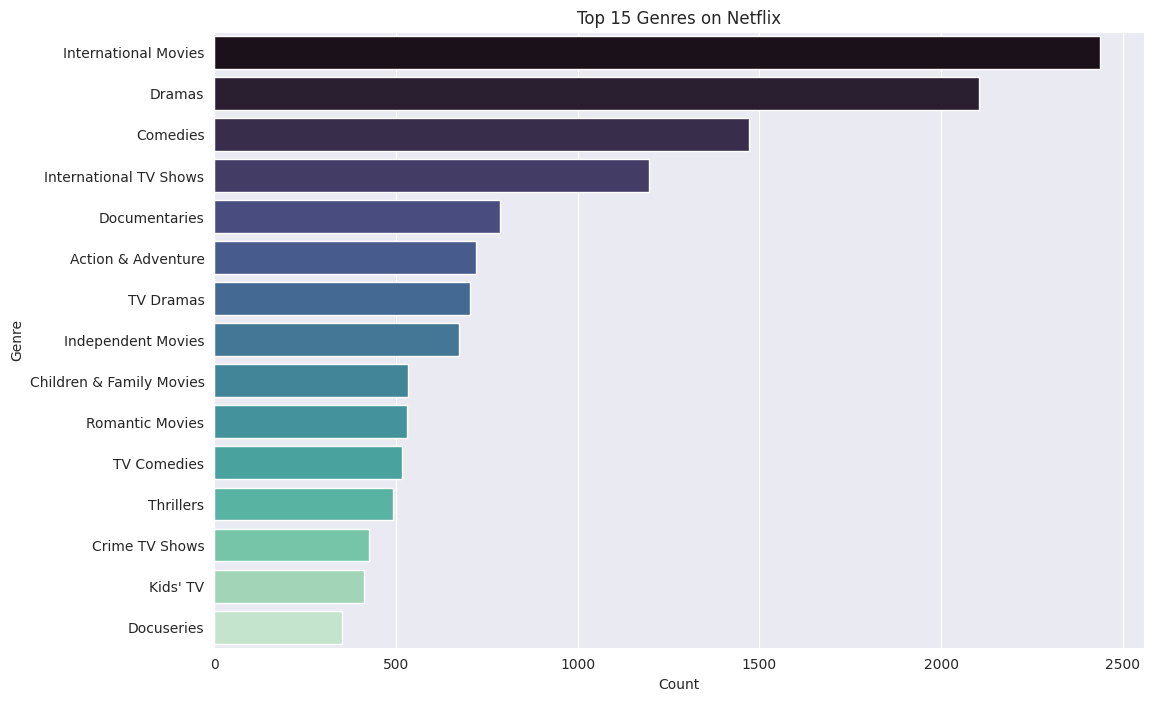

In [ ]:
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

#### 4.4 What is the distribution of content duration?

In [ ]:
# Separate movies and TV shows
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [ ]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

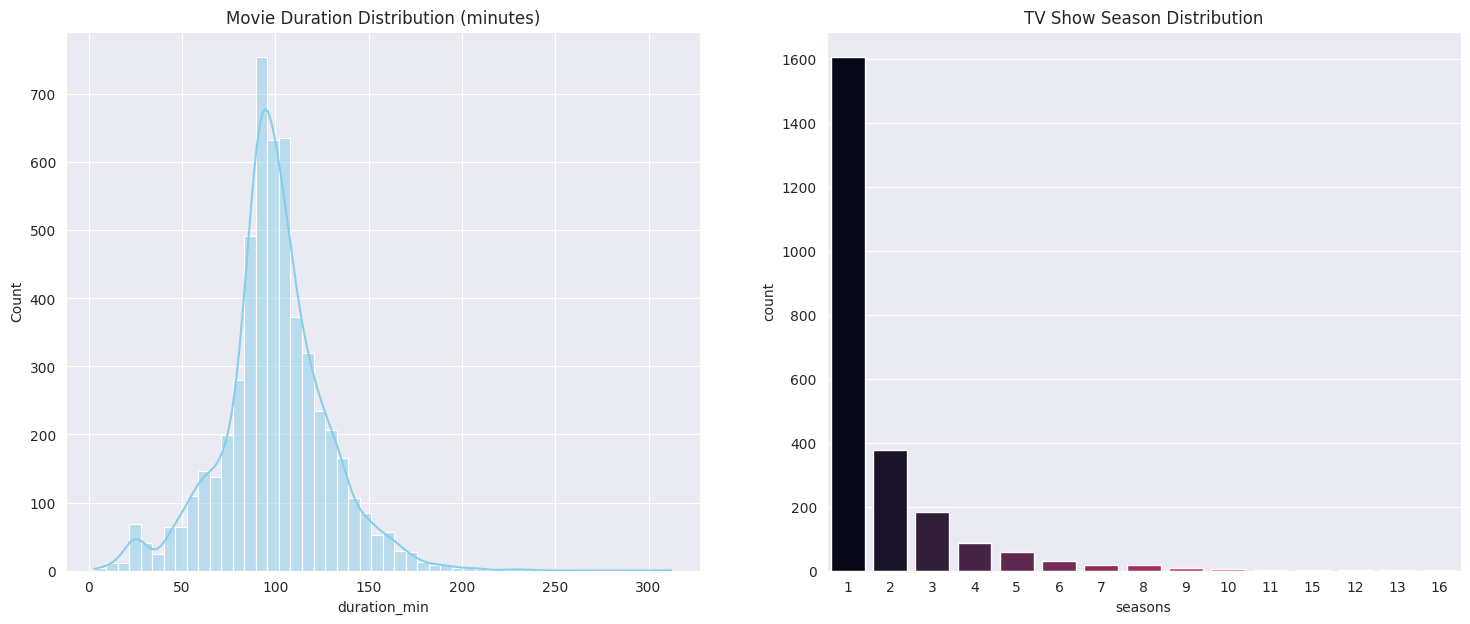

In [ ]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

#### 4.5 Where does the content come from? (Geographical Analysis)

In [ ]:
# Handle the multi-country listings similar to genres
countries = netflix_df.assign(country=netflix_df['country'].str.split(', ')).explode('country')

In [ ]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity
print(top_countries_counts)

             country  count
0      United States   3792
1              India    990
2     United Kingdom    721
3             Canada    412
4             France    349
..               ...    ...
116           Panama      1
117  United Kingdom,      1
118           Uganda      1
119     East Germany      1
120       Montenegro      1

[121 rows x 2 columns]


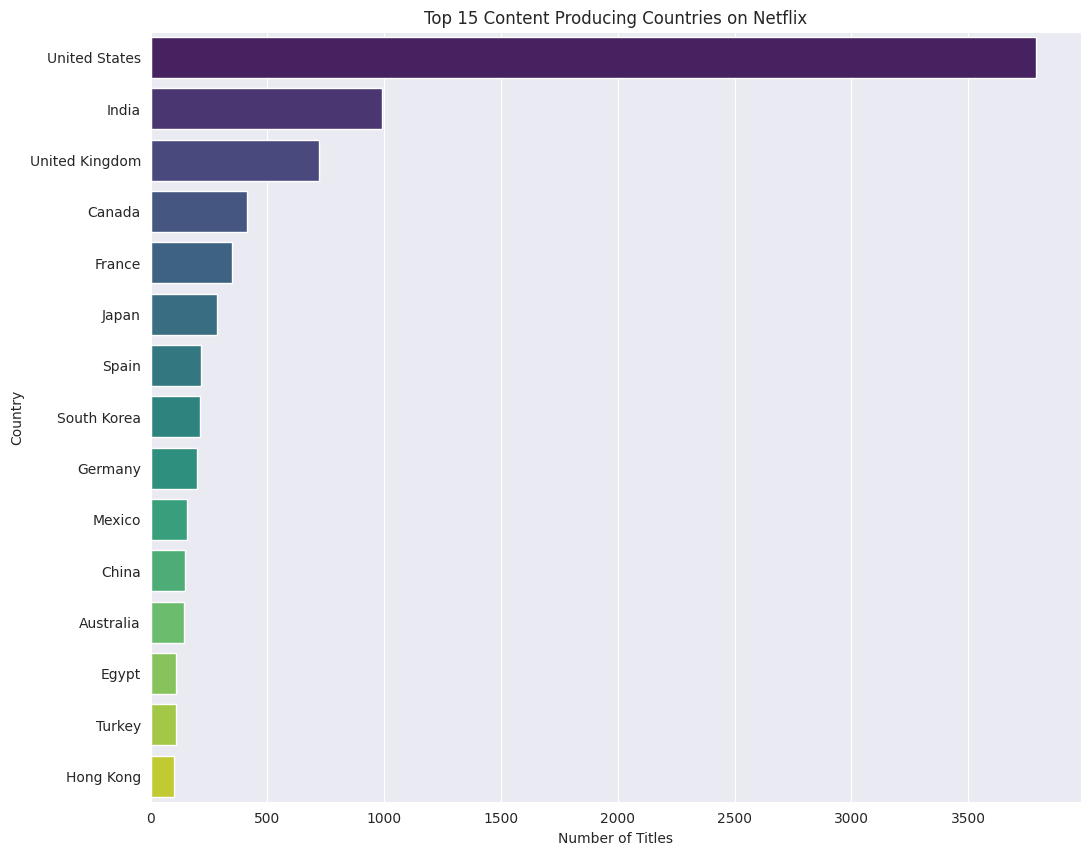

In [ ]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [ ]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


#### 4.6 What are the maturity ratings of the content?

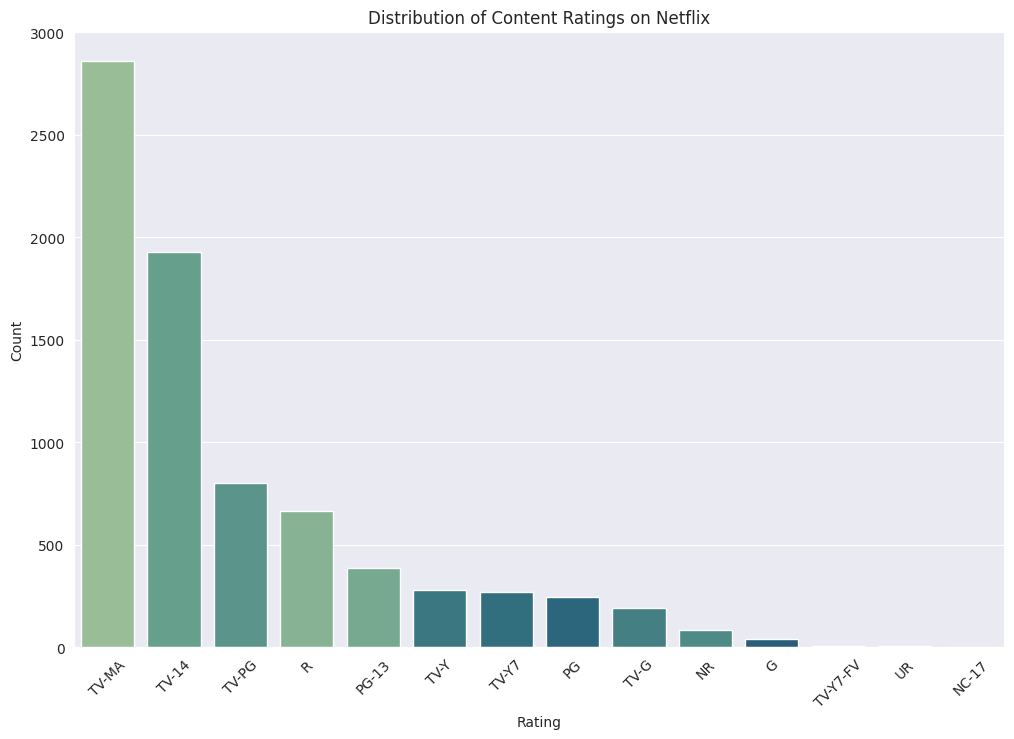

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Step 5: Feature Engineering - Content Freshness
Let's create a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

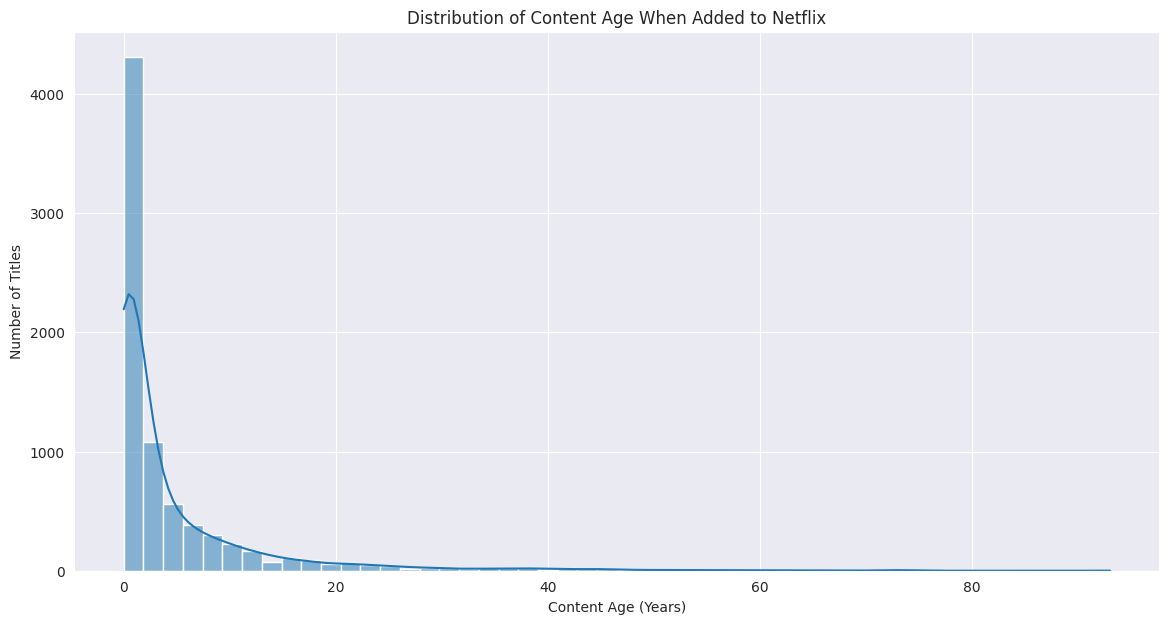

In [ ]:
# Create the 'age_on_netflix' feature
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']

# Filter out any potential errors where added_year is before release_year
content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

### Step 6: Deeper Multivariate Analysis

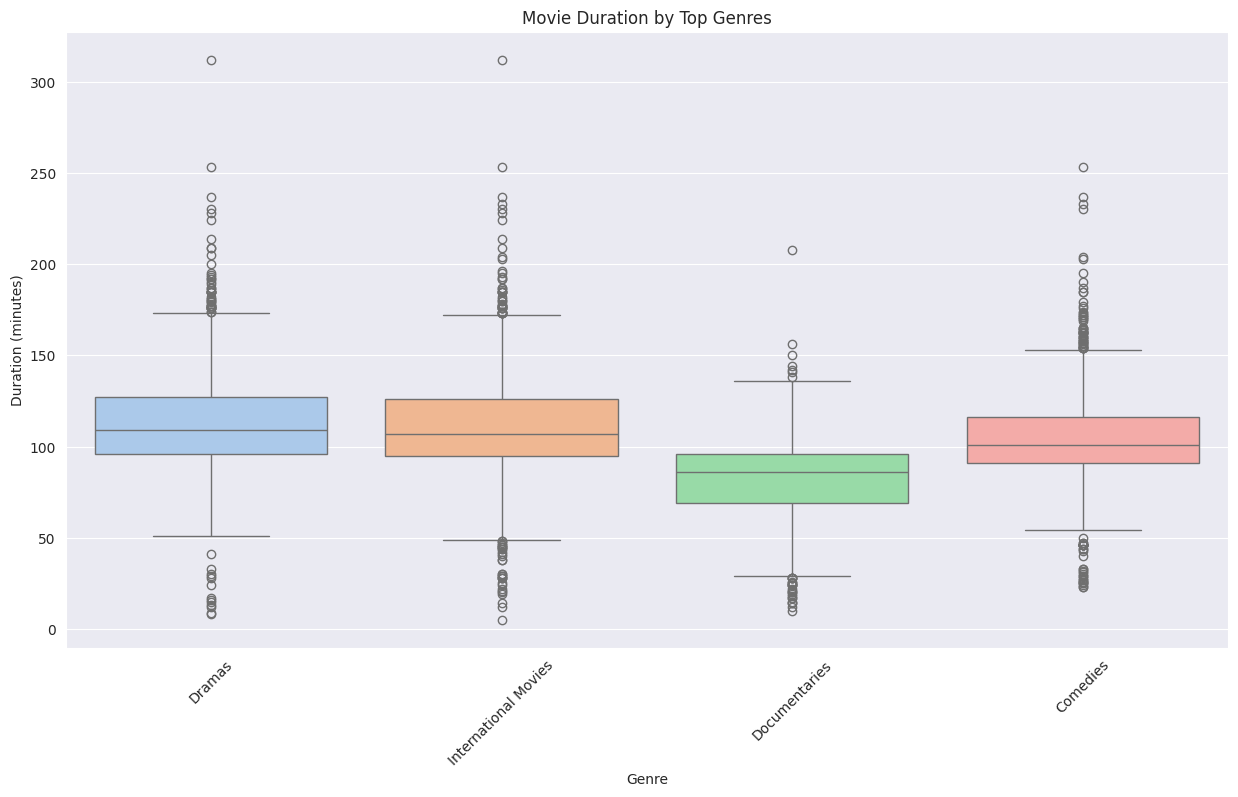

In [ ]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

### Step 7: Word Cloud from Content Descriptions

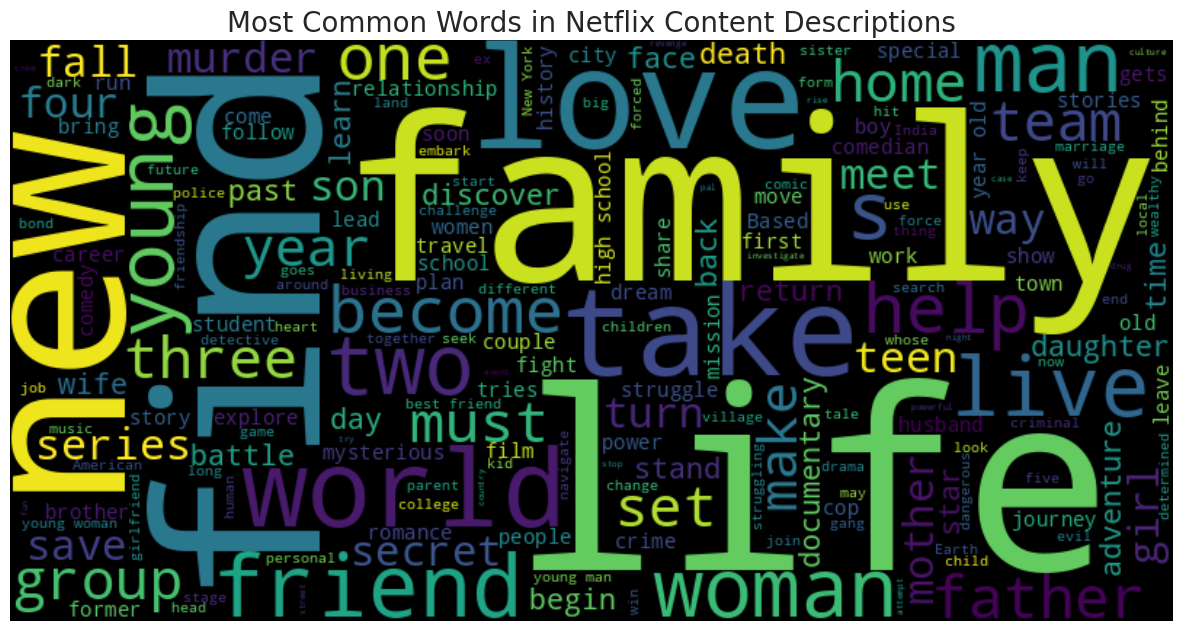

In [ ]:
# Combine all descriptions into a single string
text = ' '.join(netflix_df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

### Step 8: Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1. **Content Strategy:** Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2. **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3. **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4. **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5. **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

#Task Day 2
* How has the distribution of content ratings changed over time?
* Is there a relationship between content age and its type (Movie vs. TV Show)?
* Can we identify any trends in content production based on the release year vs. the year added to Netflix?
* What are the most common word pairs or phrases in content descriptions?
* Who are the top directors on Netflix?

####How has the distribution of content ratings changed over time?

In [ ]:
# Separate movies and TV shows
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [ ]:
movies_grouped = movies_df.groupby(['year_added', 'rating']).size().unstack().fillna(0)
tv_grouped = tv_shows_df.groupby(['year_added', 'rating']).size().unstack().fillna(0)

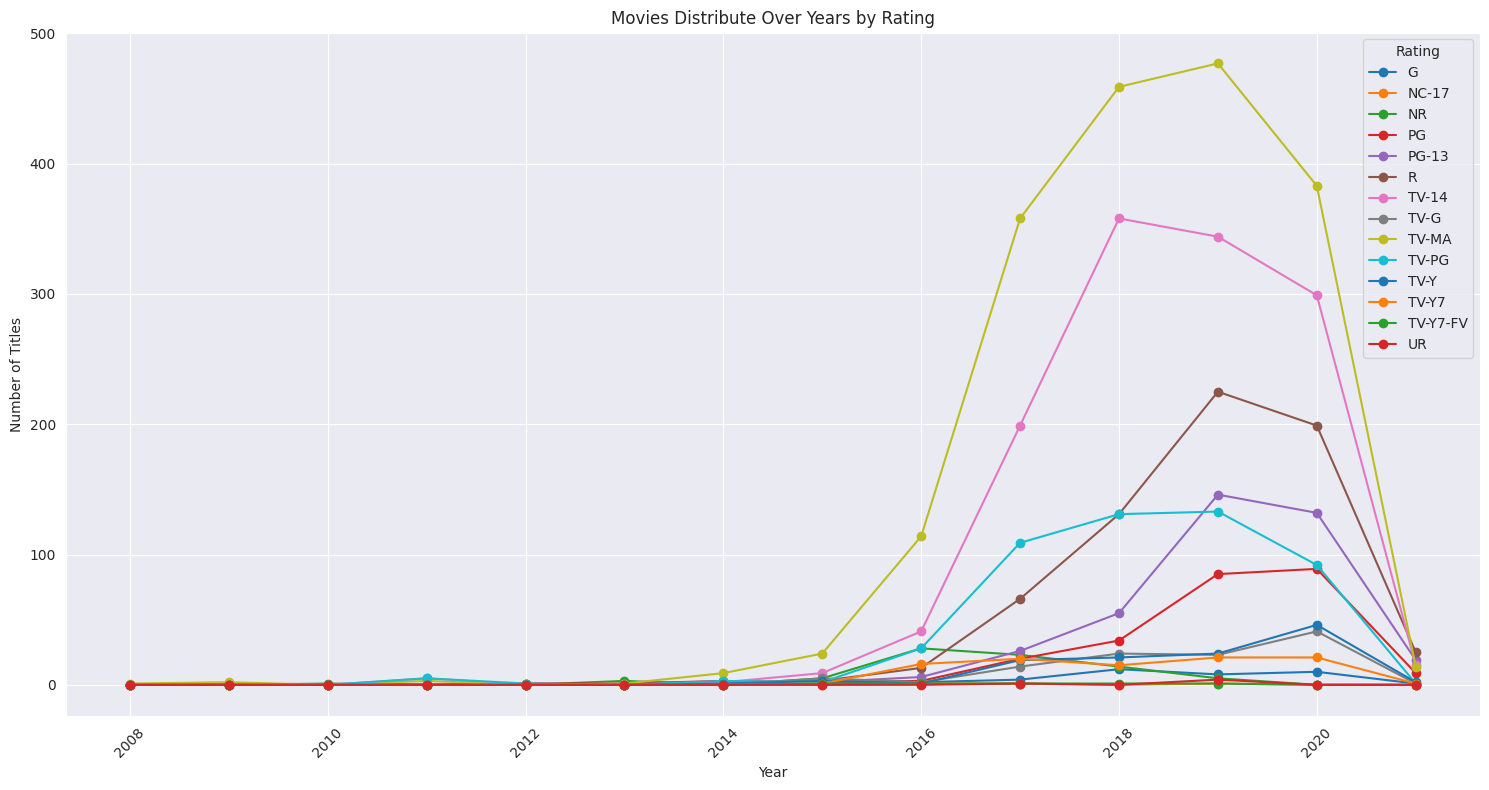

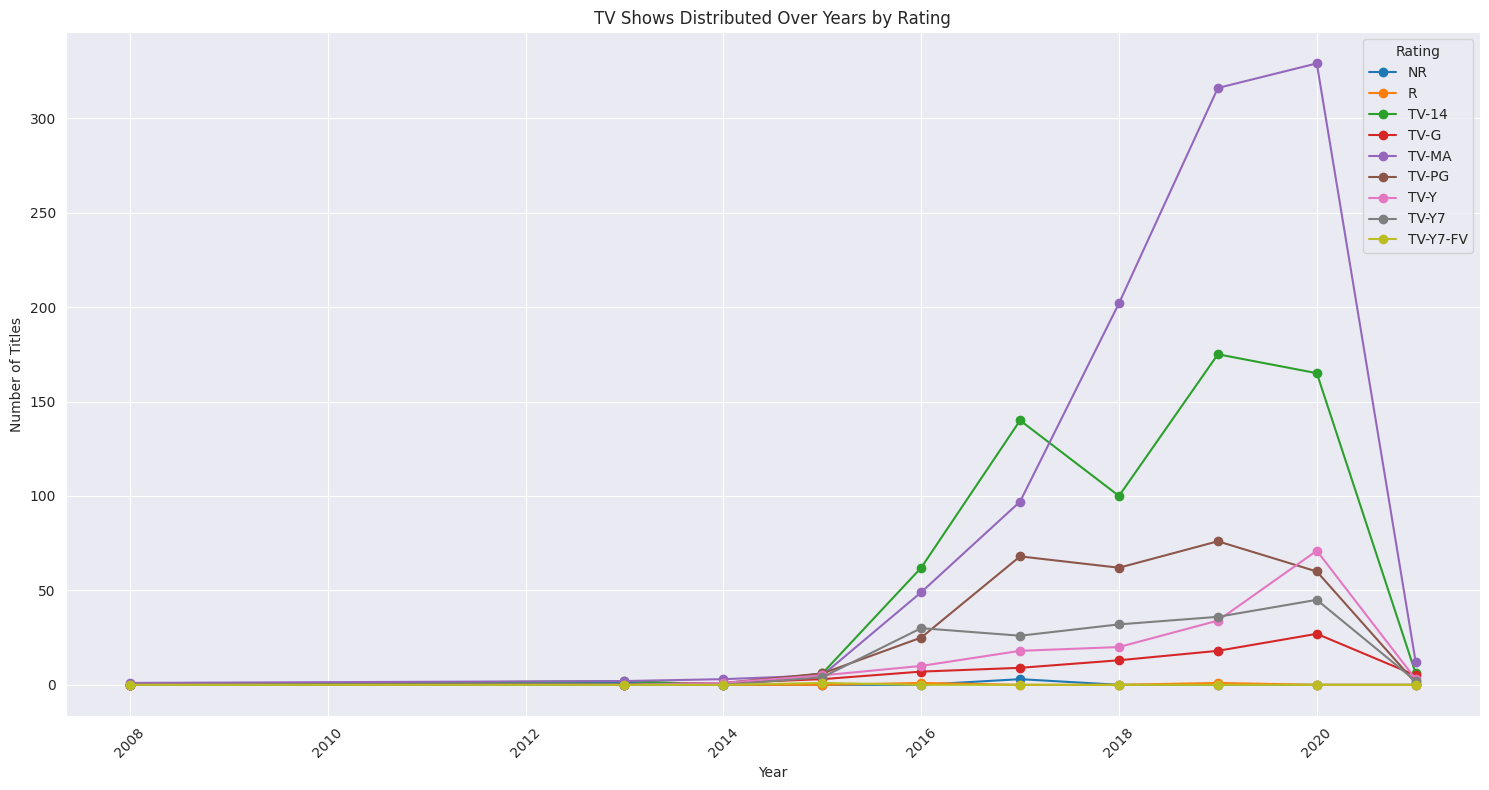

In [ ]:
plt.figure(figsize=(15, 8))

# Plot each rating as a separate line
plt.plot(movies_grouped.index,movies_grouped.values,marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Movies Distribute Over Years by Rating')
plt.legend(movies_grouped.columns, title='Rating')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(tv_grouped.index,tv_grouped.values,marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('TV Shows Distributed Over Years by Rating')
plt.legend(tv_grouped.columns, title='Rating')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Insights Q1:
We can able to see that for both the TV Shows as well as Movies the content is more about 'TV-MA'. Around 400 TV shows are added in the year 2018-2020. Around 500 movies are added in the year 2018-2020. The second highest in both TV Shows and Movies is 'TV-14'. By using the line plot, we can see the graphs and its content released in Netflix easily.

#### Is there a relationship between content age and its type (Movie vs. TV Show)?

In [ ]:
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

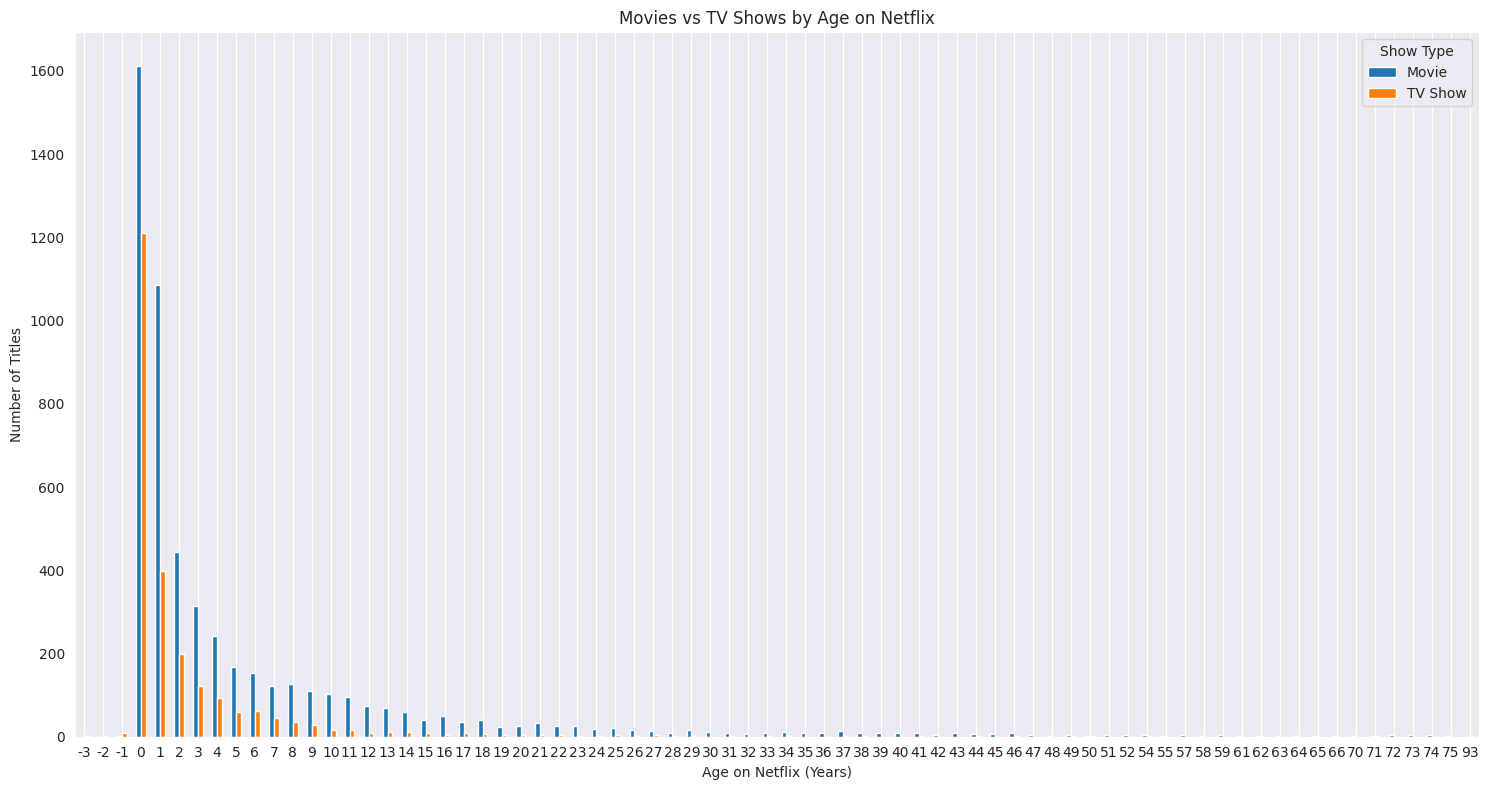

In [ ]:
content_age_type = netflix_df.groupby(['age_on_netflix', 'type']).size().unstack().fillna(0)
# Plot bar chart
content_age_type.plot(
    kind='bar',
    figsize=(15, 8),
    color=['#1f77b4', '#ff7f0e']
)

# Customize labels and title
plt.xlabel('Age on Netflix (Years)')
plt.ylabel('Number of Titles')
plt.title('Movies vs TV Shows by Age on Netflix')
plt.legend(title='Show Type')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Insights Q2: Yes, from the bar plot we can see that their are movies aged more than 70 years as well but now-a-day if the movie content released within in
0-12 months the content(Movies/TV Shows) got released in Netflix. From the bar plot, we can check the age of content on Netflix.

###Can we identify any trends in content production based on the release year vs. the year added to Netflix?

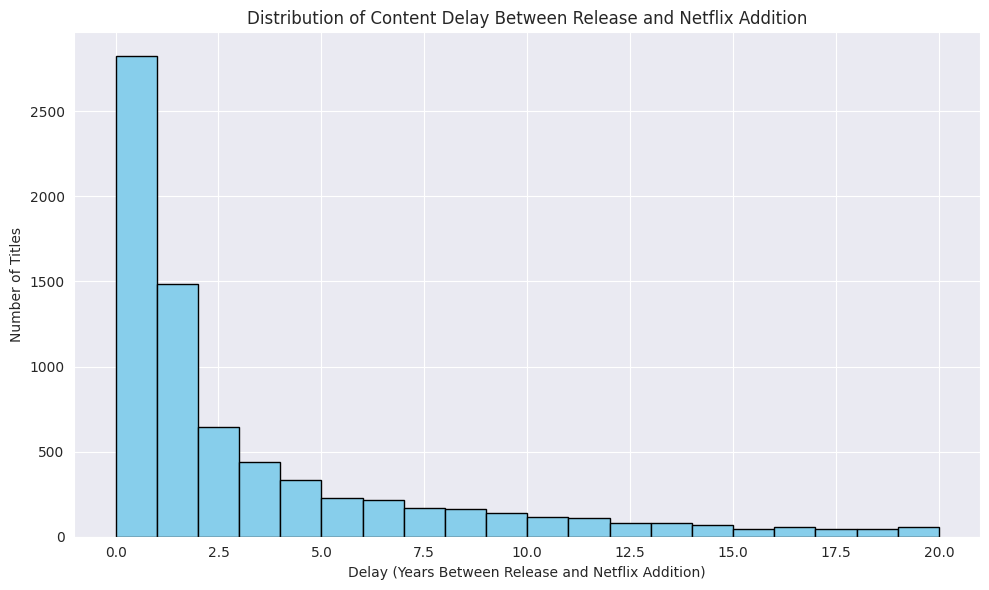

In [ ]:
import matplotlib.pyplot as plt
netflix_df['delay'] = netflix_df['year_added'] - netflix_df['release_year']
plt.figure(figsize=(10, 6))
plt.hist(netflix_df['delay'].dropna(), bins=range(0, 21), color='skyblue', edgecolor='black')
plt.xlabel('Delay (Years Between Release and Netflix Addition)')
plt.ylabel('Number of Titles')
plt.title('Distribution of Content Delay Between Release and Netflix Addition')
plt.grid(True)
plt.tight_layout()
plt.show()


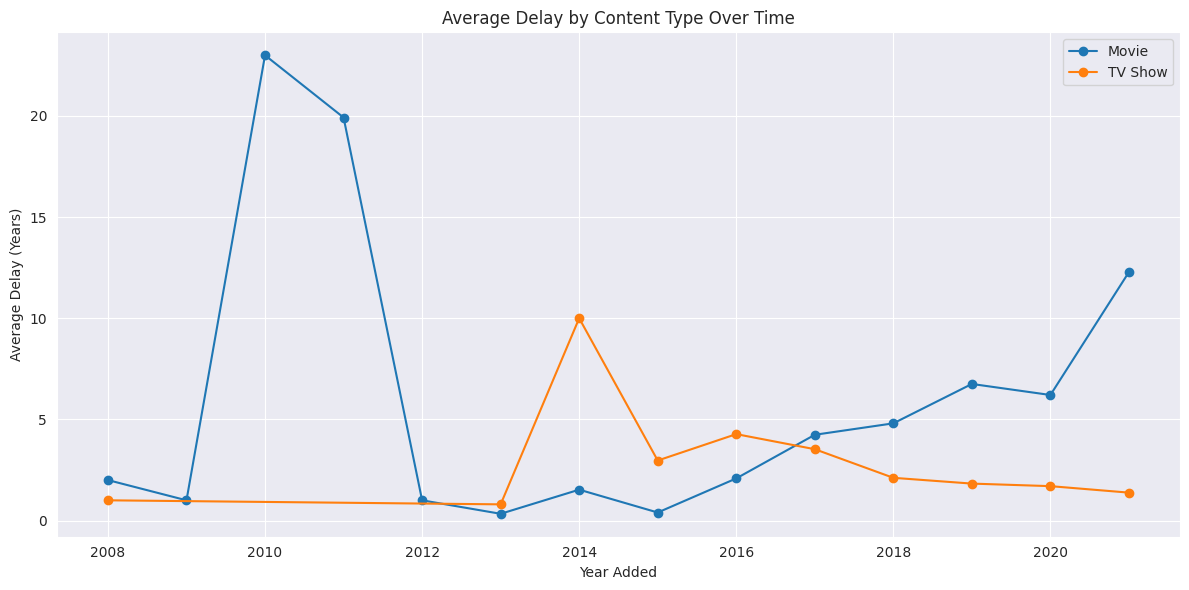

In [ ]:
plt.figure(figsize=(12, 6))
for content_type in ['Movie', 'TV Show']:
    subset = netflix_df[netflix_df['type'] == content_type]
    avg_delay = subset.groupby('year_added')['delay'].mean()
    plt.plot(avg_delay.index, avg_delay.values, marker='o', label=content_type)

plt.xlabel('Year Added')
plt.ylabel('Average Delay (Years)')
plt.title('Average Delay by Content Type Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Insights Q3: From the graphs, we can see that more movies and TV shows are releasing within 0-12 months only, their is no much waiting time for the original movie release and Netflix release. But their are some content like in early 20's their is no Netflix at that time and the blockbusters are also added on Netflix that's why we can see 20 years also.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


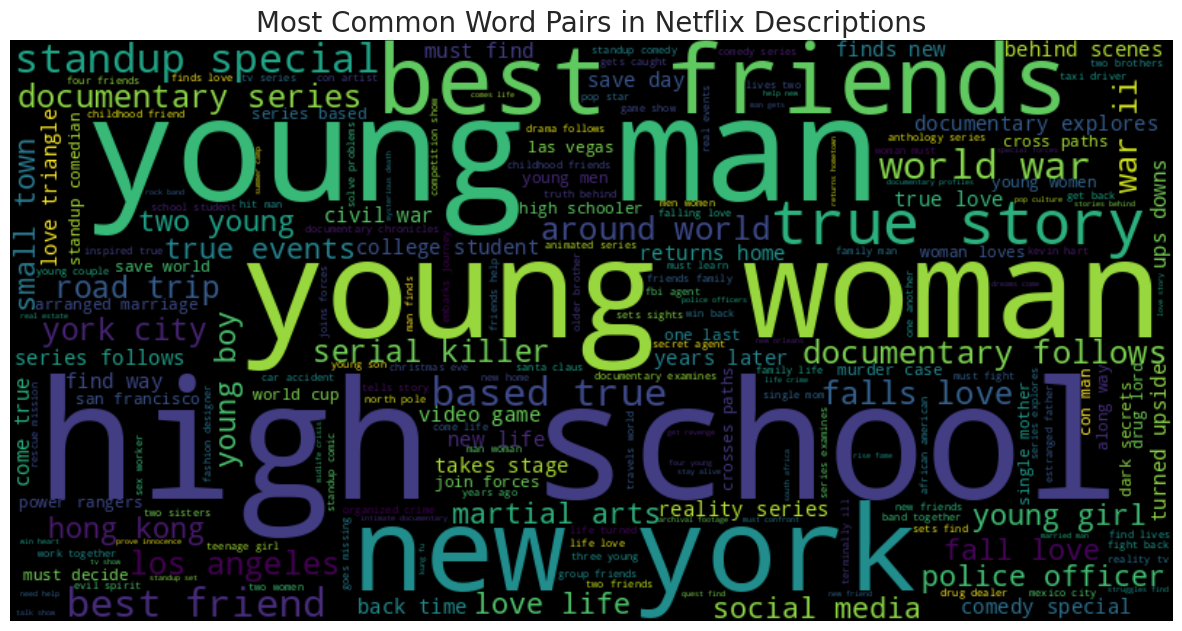

In [ ]:
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
import nltk
import matplotlib.pyplot as plt
import string

# Download stopwords (run once)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Set of stopwords
stop_words = set(stopwords.words('english'))

# Combine all descriptions into a single string
text = ' '.join(netflix_df['description'].dropna()).lower()

# Remove punctuation
for punct in string.punctuation:
    text = text.replace(punct, '')

# Tokenize words
words = text.split()

# Remove stopwords and non-alphabetic words
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Generate bigrams (word pairs)
bigrams = list(ngrams(filtered_words, 2))

# Count most common bigrams
bigram_counts = Counter(bigrams)

# Convert to a dictionary with joined bigram strings as keys
bigram_phrases = {' '.join(k): v for k, v in bigram_counts.items()}

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(bigram_phrases)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Word Pairs in Netflix Descriptions', fontsize=20)
plt.show()


Insights Q4: As similar to the single word cloud, we have also taken the description and the above generated is the word cloud from 2 similar words in every description. Netflix targets GenZ as most popular words as Young Woman,Young Man, Best Friends etc.

#### Who are the top directors on Netflix?

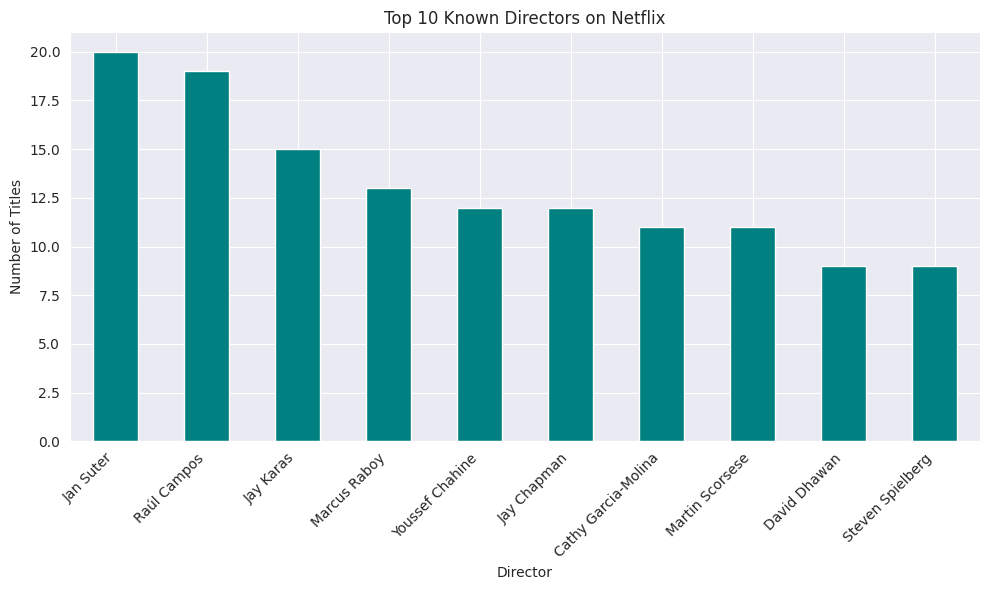

In [ ]:
known_directors = director_counts[director_counts.index != 'Unknown']

top_directors = known_directors.head(10)
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='teal')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.title('Top 10 Known Directors on Netflix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Insights Q5: From the data, the Director column is Nil so we have filled with Unknown so inorder to get the top director, I have removed the rows which contains Unknown and plot bar graph, based on the data Jan Suter is one who had the highest count of 20 and rest as follows.